In [9]:
import pandas as pd
df= pd.read_csv("/content/Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Feature Engineering

In [10]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Lebel Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Gender = le.fit_transform(df.Gender)
df.Gender

,Gender
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


# Hot lebel encoding

In [13]:
df.Geography.nunique()

3

In [14]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [15]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first')
df.Geography = ohe.fit_transform(df[['Geography']]).toarray()
df.Geography.head()

,Geography
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0.0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0.0,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0.0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0.0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0.0,0,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.Geography.unique()

array([0., 1.])

In [18]:
df = df.drop('Surname', axis=1)

# Normalization

In [19]:
# normalization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df.Balance = scaler.fit_transform(df[['Balance']])
df.Balance.head()

,Balance
0,0.000000
1,0.334031
2,0.636357
3,0.000000
4,0.500246


In [20]:
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0.0,0,42,2,0.000000,1,1,1,101348.88,1
1,2,15647311,608,0.0,0,41,1,0.334031,1,0,1,112542.58,0
2,3,15619304,502,0.0,0,42,8,0.636357,3,1,0,113931.57,1
3,4,15701354,699,0.0,0,39,1,0.000000,2,0,0,93826.63,0
4,5,15737888,850,0.0,0,43,2,0.500246,1,1,1,79084.10,0


In [21]:
df.EstimatedSalary = scaler.fit_transform(df[['EstimatedSalary']])
df.EstimatedSalary.head()

,EstimatedSalary
0,0.506735
1,0.562709
2,0.569654
3,0.469120
4,0.395400


In [22]:
df.head(10)

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,0.0,0,42,2,0.000000,1,1,1,0.506735,1
1,2,15647311,608,0.0,0,41,1,0.334031,1,0,1,0.562709,0
2,3,15619304,502,0.0,0,42,8,0.636357,3,1,0,0.569654,1
3,4,15701354,699,0.0,0,39,1,0.000000,2,0,0,0.469120,0
4,5,15737888,850,0.0,0,43,2,0.500246,1,1,1,0.395400,0
5,6,15574012,645,0.0,1,44,8,0.453394,2,1,0,0.748797,1
6,7,15592531,822,0.0,1,50,7,0.000000,2,1,1,0.050261,0
7,8,15656148,376,1.0,0,29,4,0.458540,4,1,0,0.596733,1
8,9,15792365,501,0.0,1,44,4,0.566170,2,0,1,0.374680,0
9,10,15592389,684,0.0,1,27,2,0.536488,1,1,1,0.358605,0


# Create ANN model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Define X and y (moved from a later cell to fix NameError)
X = df.drop(['Exited', 'RowNumber', 'CustomerId'], axis=1)
y = df['Exited']

# Create ANN model
model = Sequential()

model.add(Dense(10, activation='relu', input_dim=X.shape[1]))
model.add(Dense(15, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(24, activation='relu'))
model.add(Dense(28, activation='relu'))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
df.describe()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,0.250900,0.545700,38.921800,5.012800,0.304848,1.530200,0.70550,0.515100,0.500441,0.203700
std,2886.89568,7.193619e+04,96.653299,0.433553,0.497932,10.487806,2.892174,0.248696,0.581654,0.45584,0.499797,0.287580,0.402769
min,1.00000,1.556570e+07,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,2500.75000,1.562853e+07,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,0.254977,0.000000
50%,5000.50000,1.569074e+07,652.000000,0.000000,1.000000,37.000000,5.000000,0.387402,1.000000,1.00000,1.000000,0.500960,0.000000
75%,7500.25000,1.575323e+07,718.000000,1.000000,1.000000,44.000000,7.000000,0.508749,2.000000,1.00000,1.000000,0.746955,0.000000
max,10000.00000,1.581569e+07,850.000000,1.000000,1.000000,92.000000,10.000000,1.000000,4.000000,1.00000,1.000000,1.000000,1.000000


In [27]:
from sklearn.model_selection import train_test_split
X = df.drop(['Exited', 'RowNumber', 'CustomerId'], axis=1)
y = df['Exited']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7030 - loss: 1.3427 - val_accuracy: 0.7987 - val_loss: 0.5181
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7739 - loss: 0.5342 - val_accuracy: 0.7987 - val_loss: 0.4711
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7693 - loss: 0.5257 - val_accuracy: 0.7987 - val_loss: 0.8150
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7551 - loss: 0.5820 - val_accuracy: 0.7987 - val_loss: 0.7693
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7635 - loss: 0.5663 - val_accuracy: 0.7987 - val_loss: 0.5211
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7728 - loss: 0.5280 - val_accuracy: 0.8044 - val_loss: 0.4570
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7846 - loss: 0.4938 - val_accuracy: 0.7987 - val_loss: 0.4866
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7878 - loss: 0.5065 - val_accu

# Accuracy Graph

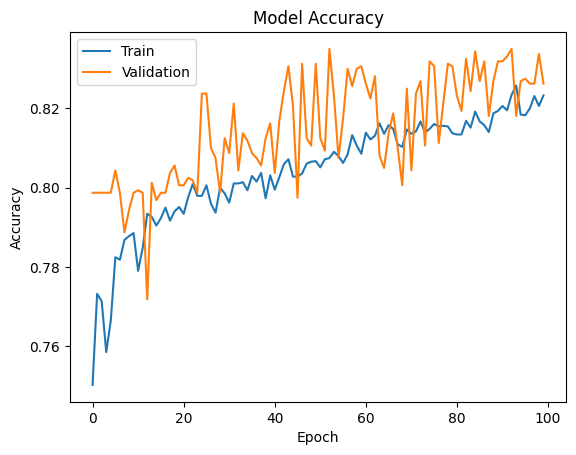

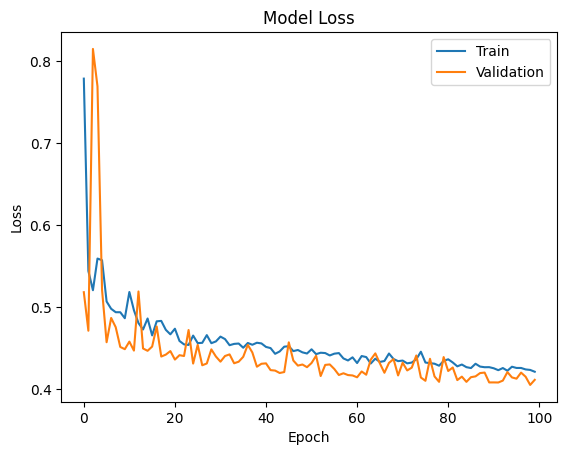

In [30]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

# Loss graph
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()
